# Generating the _**cis**_ regulatory functions for any number of transcriptional regulatory elements #

## Importing the necessary modules from python libraries ##

In [2]:
'''
We must import the following modules:

- DNAPlotLib for the creation of the construct images
- MatplotLib for the in silico visualization of the constructs (for any modifications we may want
to perform)
- skimage for the export of the construct images
- itertools for the creation of all possible arrangements given a number of boxes to use
- IPython for the diplay and rendering of LaTeX equations
'''

import dnaplotlib as dpl
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import skimage
from skimage import io
from itertools import combinations
from IPython.display import Latex, Math, display

'''
For the correct in silico visualization of the images
'''
%matplotlib inline

## Defining the synthetic promoter ##

In [114]:
'''
In this cell, we must modify the following parameters so we render the correct constructs and
obtain the correct equations
'''

# We create a general class called SyntheticPromoter, that will store the necessary data
# for further analysis, and the methods we will use for the construction of the different matrices

class SyntheticPromoter():
    
    def __init__(self, name, total_boxes, used_boxes):
        
        self.name = name
        self.total_boxes = total_boxes
        self.used_boxes = list(range(0, used_boxes+1))
        self.l_matrix = []
        self.s_matrix = []
        self.b_matrix = []
        self.t_matrix = []
        self.active_states = []
        self.partition_fun = []
        
    def createStr(self):
        
        self.str_name = []
        
        for i in range(0, self.total_boxes):
            
            self.str_name.append('{}'.format(i+1))
        
        return ''.join(self.str_name)
    
    def tfNames(self):
        
        self.tf_names = []
        
        for i in self.used_boxes:
            
            self.tf_names.append('TF{}'.format(i+1))
        
        return self.tf_names
    
    def build_L_matrix(self):
        
        for box_num in self.used_boxes:
        
            combinatory = list(combinations(self.str_name, box_num))

            for combination in combinatory:

                spaces = list(self.str_name)

                for combination_element in combination:

                    i = self.str_name.index(combination_element)

                    spaces[i] = self.tf_names[i]

                if spaces not in self.l_matrix:

                    self.l_matrix.append(spaces)
                    s_rnap = spaces+['RNAp']
                    self.l_matrix.append(s_rnap)

                else:

                    continue
                
        for line in self.l_matrix:
            
            for i in range(0, len(line)):
                
                if 'TF' in line[i] or 'RNA' in line[i]:
                    
                    continue
                
                elif 'TF' not in line[i]:
                    
                    line[i] = '1'
                
        return self.l_matrix
    
    def build_S_matrix(self):
        
        for line in self.l_matrix:
            
            new_line = []
            
            for i in range(0, len(line)):
                
                if 'TF' in line[i]:
                    
                    new_line.append('[{}]'.format(line[i]))
                    
                elif 'RNA' in line[i]:
                    
                    new_line.append('[{}]'.format(line[i]))
                
                elif 'TF' not in line[i]:
                    
                    continue
                    
            self.s_matrix.append(new_line)
            
        return self.s_matrix
    
    def build_B_matrix(self):
        
        for line in self.s_matrix:
            
            new_line = []
            
            for i in range(0, len(line)):
                
                new_line.append('K_{}'.format(line[i]))
                
            self.b_matrix.append(new_line)
            
        return self.b_matrix
    
    def build_T_matrix(self):
        
        for line in self.b_matrix:
            
            joined = ' * '.join(line)
            
            new_line = []
                
            if 'RNA' in joined:

                new_line.append('1')
                self.t_matrix.append(new_line)

            else:
                new_line.append('0')
                self.t_matrix.append(new_line)
                
        return self.t_matrix
    
    def build_active_states(self):
        
        self.a_states = []
        
        for i in range(0, len(self.t_matrix)):
            
            if self.t_matrix[i][0] == '0':
                
                continue
                
            elif self.t_matrix[i][0] != '0':

                aux_element = []

                for j in range (0, len(self.b_matrix[i])):
                    
                    element = self.b_matrix[i][j] + '*' + self.s_matrix[i][j]
                    
                    aux_element.append(element)

                self.a_states.append('['+' * '.join(aux_element)+']')
        
        self.active_states.append(' + '.join(self.a_states))
        
        return self.a_states
    
    def build_partition_fun(self):
        
        self.p_fun = []
        
        for i in range(0, len(self.t_matrix)):
            
            aux_element = []

            for j in range (0, len(self.b_matrix[i])):

                element = self.b_matrix[i][j] + '*' + self.s_matrix[i][j]

                aux_element.append(element)

            self.p_fun.append('['+' * '.join(aux_element)+']')

        self.partition_fun.append(' + '.join(self.p_fun))
        
        return self.p_fun
        
            
    #def __str__(self):
        
        #to do ...
        



In [195]:
a = SyntheticPromoter('prueba', 4, 4)


a.createStr()
a.tfNames()
a.build_L_matrix()
#a.build_S_matrix()
#a.build_B_matrix()
#a.build_T_matrix()
#a.build_active_states()
#a.build_partition_fun()

[['1', '1', '1', '1'],
 ['1', '1', '1', '1', 'RNAp'],
 ['TF1', '1', '1', '1'],
 ['TF1', '1', '1', '1', 'RNAp'],
 ['1', 'TF2', '1', '1'],
 ['1', 'TF2', '1', '1', 'RNAp'],
 ['1', '1', 'TF3', '1'],
 ['1', '1', 'TF3', '1', 'RNAp'],
 ['1', '1', '1', 'TF4'],
 ['1', '1', '1', 'TF4', 'RNAp'],
 ['TF1', 'TF2', '1', '1'],
 ['TF1', 'TF2', '1', '1', 'RNAp'],
 ['TF1', '1', 'TF3', '1'],
 ['TF1', '1', 'TF3', '1', 'RNAp'],
 ['TF1', '1', '1', 'TF4'],
 ['TF1', '1', '1', 'TF4', 'RNAp'],
 ['1', 'TF2', 'TF3', '1'],
 ['1', 'TF2', 'TF3', '1', 'RNAp'],
 ['1', 'TF2', '1', 'TF4'],
 ['1', 'TF2', '1', 'TF4', 'RNAp'],
 ['1', '1', 'TF3', 'TF4'],
 ['1', '1', 'TF3', 'TF4', 'RNAp'],
 ['TF1', 'TF2', 'TF3', '1'],
 ['TF1', 'TF2', 'TF3', '1', 'RNAp'],
 ['TF1', 'TF2', '1', 'TF4'],
 ['TF1', 'TF2', '1', 'TF4', 'RNAp'],
 ['TF1', '1', 'TF3', 'TF4'],
 ['TF1', '1', 'TF3', 'TF4', 'RNAp'],
 ['1', 'TF2', 'TF3', 'TF4'],
 ['1', 'TF2', 'TF3', 'TF4', 'RNAp'],
 ['TF1', 'TF2', 'TF3', 'TF4'],
 ['TF1', 'TF2', 'TF3', 'TF4', 'RNAp']]

## Generating the DNAplots ##

In [252]:
# Import the necessary modules

import dnaplotlib as dpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage import io
%matplotlib inline 

In [284]:
# Create a color dictionary for easier visualization

def color_dec(r, g, b):
    
    rgb = []
    
    red_dec = round(r/256, 5)
    green_dec = round(g/256, 5)
    blue_dec = round(b/256, 5)
    
    rgb.append(red_dec)
    rgb.append(green_dec)
    rgb.append(blue_dec)
    
    return rgb
    
sunset1 = color_dec(1,8,79)
sunset2 = color_dec(57,25,84)
sunset3 = color_dec(99,30,80)
sunset4 = color_dec(167,60,90)
sunset5 = color_dec(255,121,84)

col_map = {} # Empty Dictionary

col_map['sunset1'] = sunset1
col_map['sunset2'] = sunset2
col_map['sunset3'] = sunset3
col_map['sunset4'] = sunset4
col_map['sunset5'] = sunset5


In [285]:
# CDS formatting

promoters = []

for promoter in range(0, len(a.l_matrix)):
    
    prom = []
    starting_points = list(range(0, len(a.l_matrix)*70, 70))
    count = 0

    for box in a.l_matrix[promoter]:
        
        if box == '1':
            
            empty_box = {'type':'UserDefined', 'name':'Box {}'.format(promoter), 'start': starting_points[count], 'end': starting_points[count]+40, 'fwd':True, 'opts':{'label':'Empty\nBox', 'label_y_offset': -8, 'label_size': 2, 'color': col_map['sunset1'], 'fill_color': col_map['sunset2']}}
            prom.append(empty_box)
            count += 1
            
        elif box != '1' and box != 'RNAp':
            
            used_box = {'type':'UserDefined', 'name':'{}'.format(box), 'start': starting_points[count], 'end': starting_points[count]+40, 'fwd':True, 'opts':{'label':box, 'label_y_offset': -6,'label_size': 2, 'color': col_map['sunset3'], 'fill_color': col_map['sunset4']}}
            prom.append(used_box)
            count += 1
            
        elif box != '1' and box == 'RNAp':
            
            rnapol = {'type':'Promoter', 'name':'{}'.format(box), 'start': starting_points[count], 'end': starting_points[count]+40, 'fwd':True, 'opts':{'label':box, 'label_y_offset': -4, 'label_size': 2, 'color': col_map['sunset5']}}
            prom.append(rnapol)
            count += 1
        
    promoters.append(prom)
    
# Promoters is a list of lists, each of which corresponds to a different arrangement of elements of the promoter

In [286]:
def plot_trace_3_axes (designs, output_prefix): #Se usa como input los diseños y el nombre que llevara el archivo final

    fig = plt.figure(figsize=(5, 5))
    
    gs = gridspec.GridSpec((len(promoters)//2)+1, 2)
    
    dr = dpl.DNARenderer()
    
    for i in range(0, len(promoters)//2):
            
        dna_frame = plt.subplot(gs[i, 0])
        start, end = dr.renderDNA(dna_frame, designs[i], dr.SBOL_part_renderers(), plot_backbone=True)
        dna_len = end - start
        dna_frame.set_xlim([start, end])
        dna_frame.set_ylim([-5, 15])
        dna_frame.set_aspect('equal')
        dna_frame.set_xticks([])
        dna_frame.set_yticks([])
        dna_frame.axis('off')
            
    for i in range(0, len(promoters)//2):

        dna_frame = plt.subplot(gs[i, 1])
        start, end = dr.renderDNA(dna_frame, designs[i+len(promoters)//2], dr.SBOL_part_renderers(), plot_backbone=True)
        dna_len = end - start
        dna_frame.set_xlim([start, end])
        dna_frame.set_ylim([-5, 15])
        dna_frame.set_aspect('equal')
        dna_frame.set_xticks([])
        dna_frame.set_yticks([])
        dna_frame.axis('off')

    fig.savefig(output_prefix+'.pdf', transparent=True)
    fig.savefig(output_prefix+'.png', dpi=500)
    
    plt.close('all')

In [287]:
plot_trace_3_axes(promoters, 'testing2')

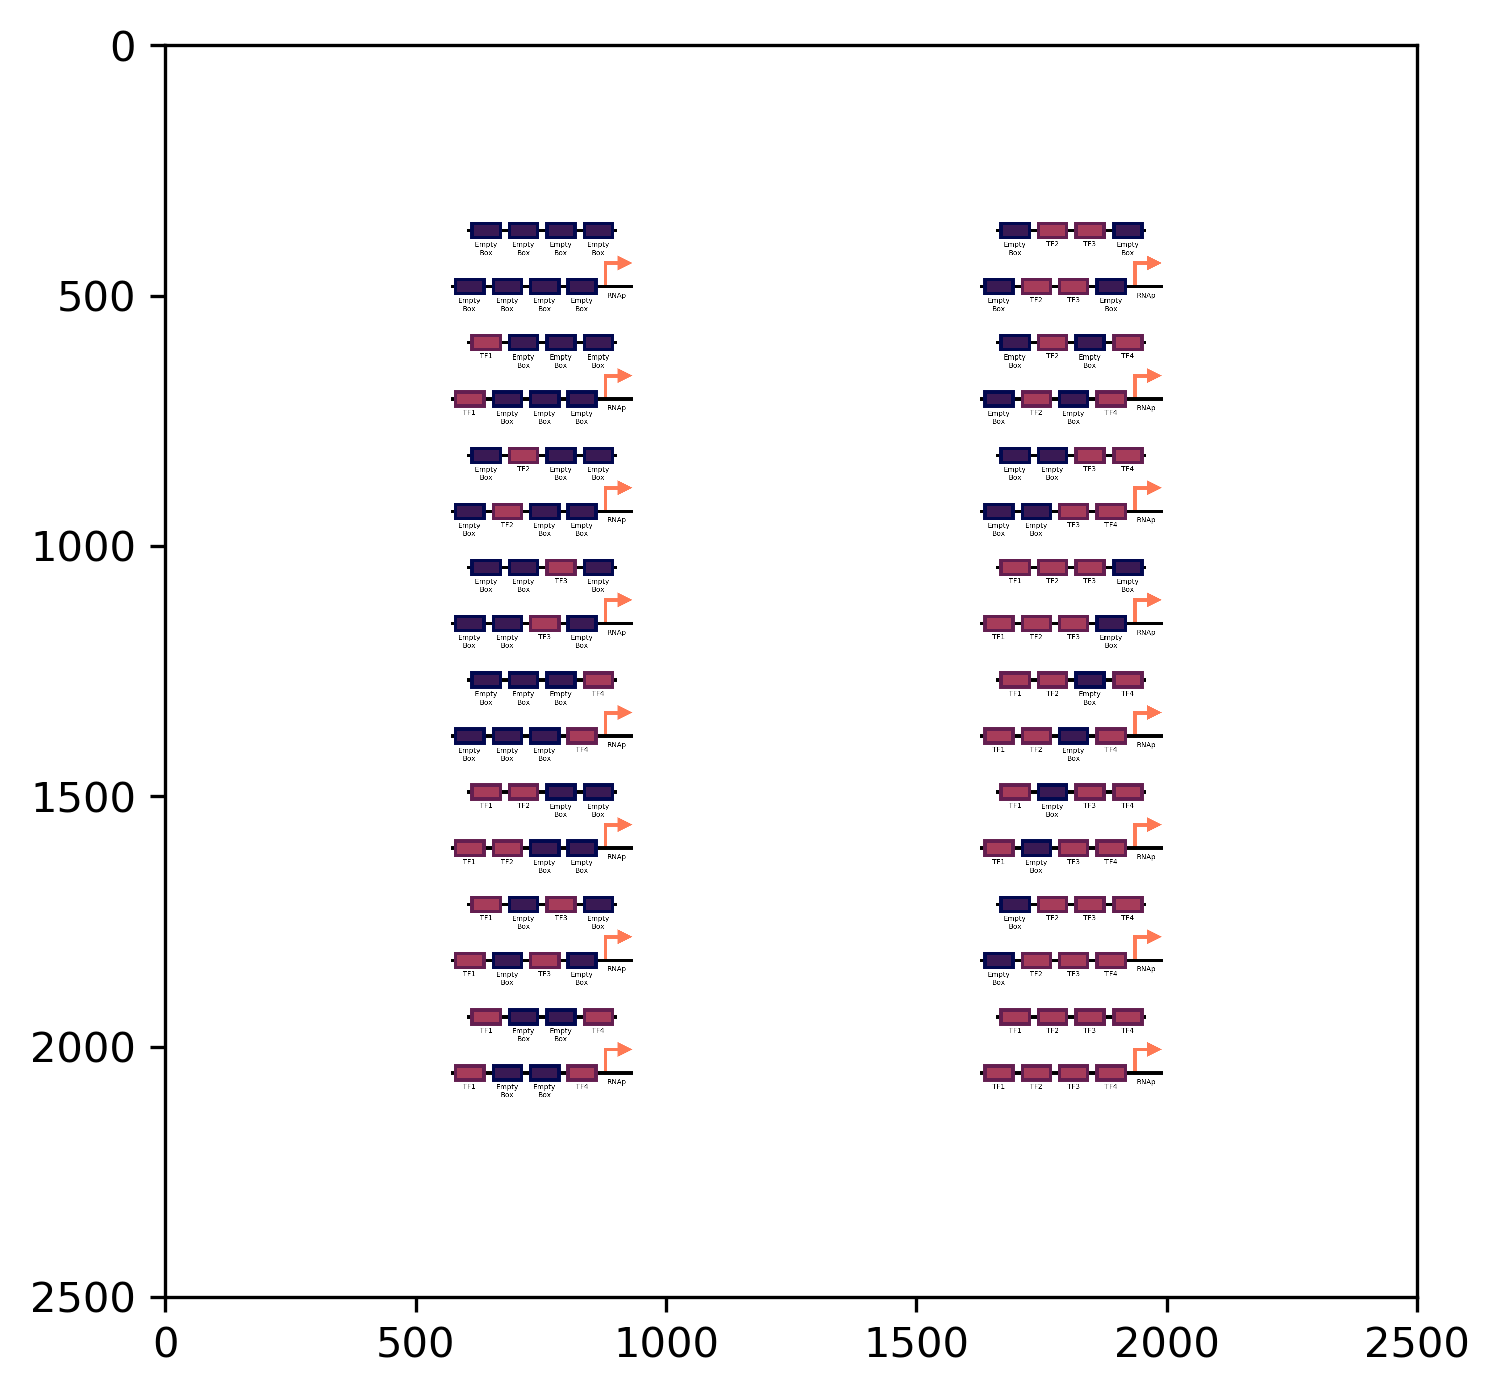

In [288]:
img = io.imread('testing2.png')
plt.figure(figsize=(5, 5), dpi=300)
io.imshow(img, cmap='gray')